<a href="https://colab.research.google.com/github/krithi65/ML-/blob/main/chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHENNAI HOUSE PRICE PREDICTION**

# import data for prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [3]:
df = pd.read_csv('train-chennai-sale.csv')

In [4]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.shape

(7109, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# since N_BEDROOM and N_BATHROOM is catagorical value ,fill the null values with mode

# since QS_OVERALL value is continuous , fill the missing values with mean

In [8]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [9]:
df['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [10]:
df['QS_OVERALL'].mean()

3.5032537884152384

In [11]:
df['N_BEDROOM'].fillna(value=df['N_BEDROOM'].mode()[0],inplace = True)
df['N_BATHROOM'].fillna(value=df['N_BATHROOM'].mode()[0],inplace = True)

In [12]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [13]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# change the datatype of float to int(N_BATHROOMS,N_BEDROOMS)

In [14]:
df.N_BEDROOM = df.N_BEDROOM.astype(int)
df.N_BATHROOM = df.N_BATHROOM.astype(int)

In [15]:
# dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)

In [16]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [17]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


# drop unnecessary columns

In [18]:
df = df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'], axis=1)

In [19]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


##  **DATA CLEANING**

# **AREA**

In [20]:
df.AREA = df.AREA.str.lower()
df.AREA.value_counts()

chrompet      1681
karapakkam    1363
kk nagar       996
velachery      979
anna nagar     783
adyar          773
t nagar        496
chrompt          9
chrmpet          6
chormpet         6
tnagar           5
karapakam        3
ana nagar        3
velchery         2
ann nagar        2
adyr             1
kknagar          1
Name: AREA, dtype: int64

In [21]:
df.AREA = df.AREA.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})

In [22]:
df.AREA.value_counts()

chrompet      1702
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'AREA')

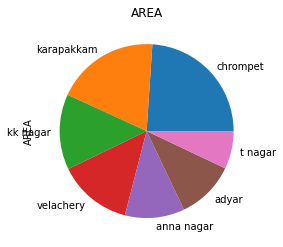

In [23]:
df['AREA'].value_counts().plot(kind='pie')
plt.title('AREA')

# interpretation:chrompet has more area and t nagar has less area

#  **INT_SQFT**

In [24]:
df.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


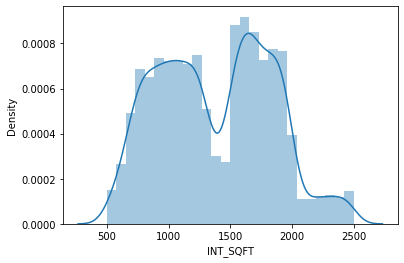

In [25]:
sns_plot = sns.distplot(df["INT_SQFT"])

# **DATE_SALE**

In [26]:
# Correcting Date columnd from object to daterime format
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')


# interpretation:changed to date format

# **DIST_MAINROAD**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


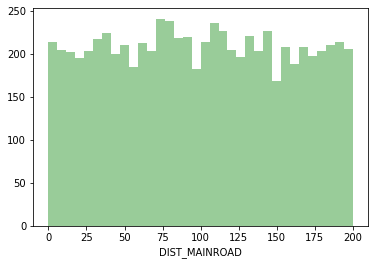

In [27]:
sns.distplot(df['DIST_MAINROAD'], kde = False, color = 'green', bins=34)

# interpretation:it is uniformly distributed

# N_BEDROOM

In [28]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [29]:
df['N_BEDROOM'].isnull().sum()#check whether it has null values

0

Text(0.5, 1.0, 'N_BEDROOM')

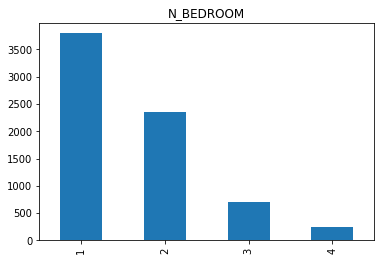

In [30]:
df['N_BEDROOM'].value_counts().plot(kind='bar');
plt.title('N_BEDROOM')

# interpretation:most number of houses available have only one bedroom

# N_BATHROOM

In [31]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

In [32]:
df['N_BATHROOM'].isnull().sum()#check whether it has null values

0

Text(0.5, 1.0, 'N_BATHROOM')

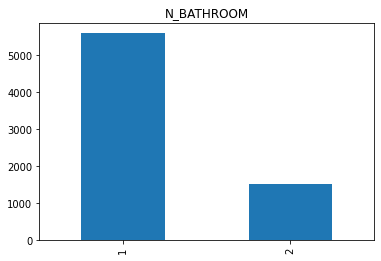

In [33]:
df['N_BATHROOM'].value_counts().plot(kind='bar');
plt.title('N_BATHROOM')

# interpretation: The most number of houses has one bathroom

# **N-Room**

In [34]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [35]:
df['N_ROOM'].isnull().sum()#check whether it has null values

0

Text(0.5, 1.0, 'N_ROOM')

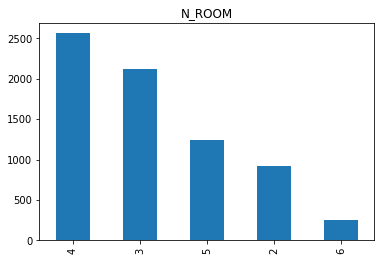

In [36]:
df['N_ROOM'].value_counts().plot(kind='bar')
plt.title('N_ROOM')

# interpretation:4 rooms are more

eighth feature -data cleaning-**SALE_COND**

In [37]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [38]:
# Correcting the spelling mistakes that are present in the column using replace with the dictionary formatting
df['SALE_COND'].replace({"Ab Normal": "AbNormal", "Partiall":"Partial", "PartiaLl": "Partial", "Adj Land":"AdjLand"}, inplace = True)

In [39]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Text(0.5, 1.0, 'SALE_COND')

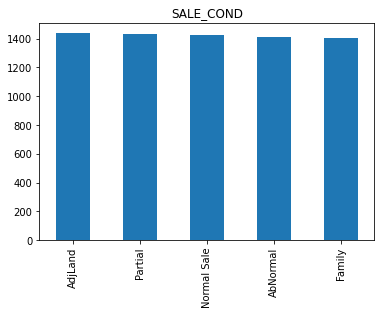

In [40]:
df['SALE_COND'].value_counts().plot(kind='bar')
plt.title('SALE_COND')

# interpretation:all sales are equal

# PARK_FACIL

In [41]:
df.PARK_FACIL.value_counts() 

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [42]:
# Correcting the spelling mistakes that are present in the column using replace with the dictionary formatting
df['PARK_FACIL'].replace({"Noo":"No"}, inplace=True)

In [43]:
df.PARK_FACIL.value_counts() 

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

Text(0.5, 1.0, 'Distribution of column PARK_FACIL')

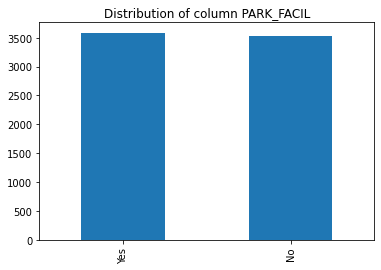

In [44]:
df['PARK_FACIL'].value_counts().plot(kind='bar');
plt.title('Distribution of column PARK_FACIL')

# interpretation:Its eqully distributed

# data build

In [45]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

11th feature-data cleaning-BUILDTYPE

In [46]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [47]:
df['BUILDTYPE'].replace({"Other":"Others", "Comercial":"Commercial"}, inplace = True)
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

Text(0.5, 1.0, 'BUILDTYPE')

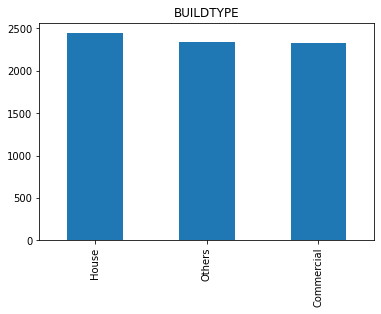

In [48]:
df['BUILDTYPE'].value_counts().plot(kind='bar');
plt.title('BUILDTYPE')

# interpretation:house is higher than others

# UTILITY_AVAIL

In [49]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [50]:
df['UTILITY_AVAIL'].replace({"All Pub": "AllPub"}, inplace = True)
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, ' UTILITY_AVAIL')

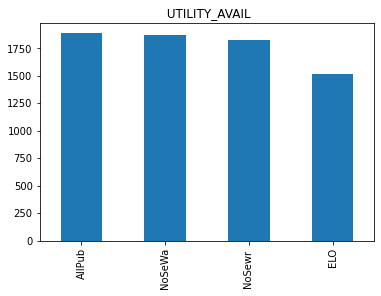

In [51]:
df['UTILITY_AVAIL'].value_counts().plot(kind='bar');
plt.title(' UTILITY_AVAIL')

# interpretation:ALL pub and No seWa are equal

# Street

In [52]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [53]:
df['STREET'].replace({"Pavd":"Paved", "NoAccess":"No Access"}, inplace = True)
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Text(0.5, 1.0, 'STREET')

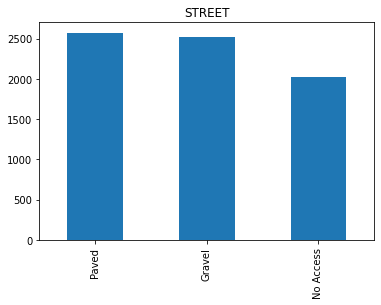

In [54]:
df['STREET'].value_counts().plot(kind='bar')
plt.title('STREET')

# interpretation:paved and graved streets are equally considered than no access.

# MZ ZONE

In [55]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'Distribution of column MZZONE')

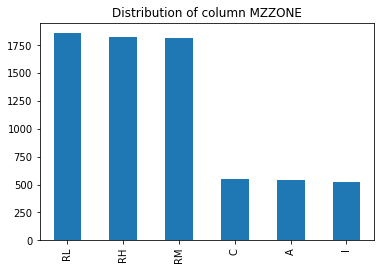

In [56]:
df['MZZONE'].value_counts().plot(kind='bar');
plt.title('Distribution of column MZZONE')

# date  sale and date build will give the age of house

# **AGE OF HOUSE**

In [57]:
df['AGE_OF_HOUSE'] = df['DATE_SALE'] - df['DATE_BUILD']

# convert data type of AGE OF HOUSES to float



In [58]:
df['AGE_OF_HOUSE'] = df['AGE_OF_HOUSE'].astype(str)

In [59]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16060 days
1,anna nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7094 days
3,velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10950 days


In [60]:
df['AGE_OF_HOUSE'] = df['AGE_OF_HOUSE'].astype(str).str[:-4]#remove days as string datatype is not predicted

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


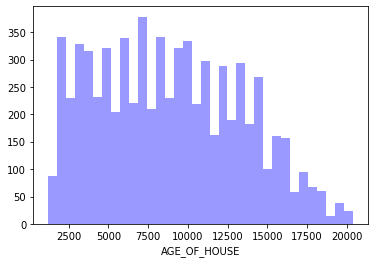

In [61]:
sns.distplot(df['AGE_OF_HOUSE'], kde = False, color = 'blue', bins=34)

In [62]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE_OF_HOUSE             object
dtype: object

In [63]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16060
1,anna nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015


# EDA

**AREA VS SALES PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


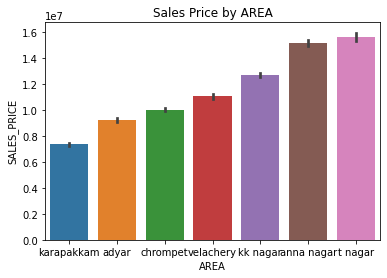

In [64]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.AREA,df.SALES_PRICE,order=df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
plt.title("Sales Price by AREA")
plt.show()

there is a linear relationship between target and feature
it is a important feature and we can do label encoding

**INT_SQFT VS SALES PRICE**

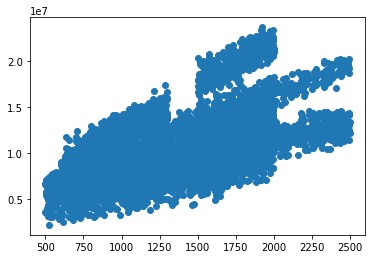

In [65]:
plt.scatter(df['INT_SQFT'], df['SALES_PRICE'])

there is a linear relationship between int srft and sales price
since both are continuous no encoding needed

**DIST_MAINROAD vs SALES_PRICE**

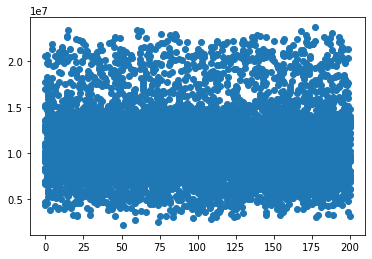

In [66]:
plt.scatter(df['DIST_MAINROAD'], df['SALES_PRICE'])

there is no linear relationship
so we can drop the column

In [67]:
df.drop('DIST_MAINROAD', inplace=True, axis=1)

In [68]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_OF_HOUSE
0,karapakkam,1004,2011-05-04,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16060
1,anna nagar,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015


**N_BEDROOM vs SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


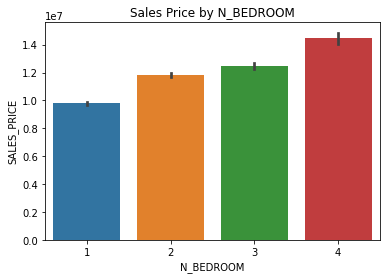

In [69]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.N_BEDROOM,df.SALES_PRICE,order=df.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])
plt.title("Sales Price by N_BEDROOM")
plt.show()

there is a linear relationship so N_BEDROOM is a important feature
NO encoding reqired

**N-BATHROOM AND SALES PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


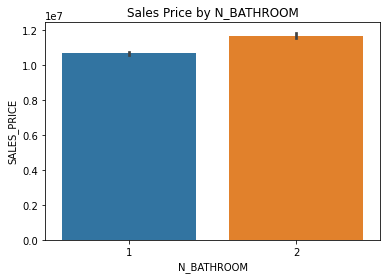

In [70]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.N_BATHROOM,df.SALES_PRICE,order=df.groupby("N_BATHROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BATHROOM"])
plt.title("Sales Price by N_BATHROOM")
plt.show()

there is a linear relationship so N_BathROOM is a important feature
NO encoding reqired

**N-ROOM vs sales price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


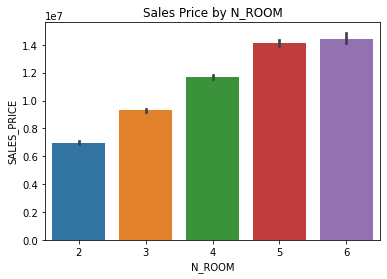

In [71]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.N_ROOM,df.SALES_PRICE,order=df.groupby("N_ROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_ROOM"])
plt.title("Sales Price by N_ROOM")
plt.show()

there is a linear relationship so N_ROOM is a important feature
NO encoding reqired

**SALE_COND** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


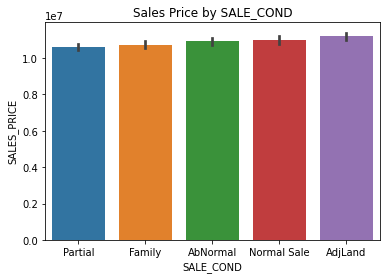

In [72]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.SALE_COND,df.SALES_PRICE,order=df.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])
plt.title("Sales Price by SALE_COND")
plt.show()

since there is no relationship we can drop the feature

In [73]:
df.drop('SALE_COND', inplace=True, axis=1)

**PARK_FACIL** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


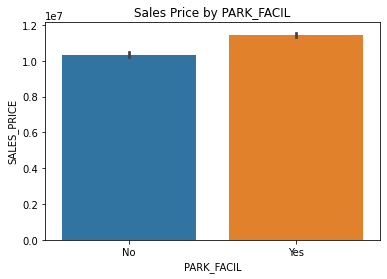

In [74]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.PARK_FACIL,df.SALES_PRICE,order=df.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])
plt.title("Sales Price by PARK_FACIL")
plt.show()

there is a linear relationship between this feature and target
We need to do label encoding

**BUILDTYPE** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


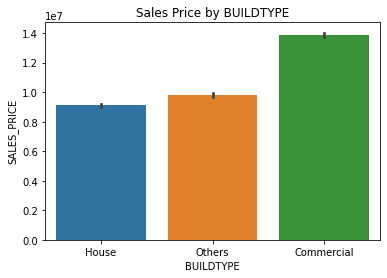

In [75]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.BUILDTYPE ,df.SALES_PRICE,order=df.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])
plt.title("Sales Price by BUILDTYPE")
plt.show()

there is a relation but no linear relationship,so we do one hot encoding

**UTILITY_AVAIL** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


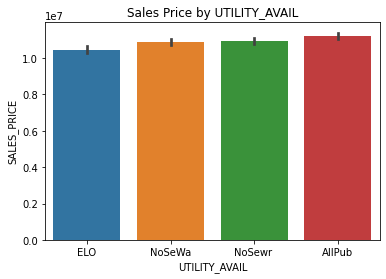

In [76]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.UTILITY_AVAIL,df.SALES_PRICE,order=df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])
plt.title("Sales Price by UTILITY_AVAIL")
plt.show()

In [77]:
df.drop('UTILITY_AVAIL', inplace=True, axis=1)

SINCE THERE IS so minute difference in relationship we drop the feature

**STREET** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


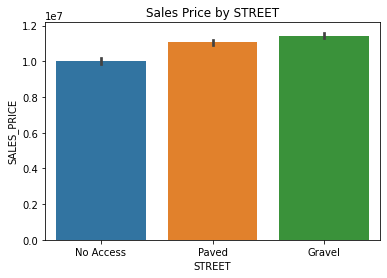

In [78]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.STREET,df.SALES_PRICE,order=df.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])
plt.title("Sales Price by STREET")
plt.show()

 there is a linear relationship between this feature and target
We need to do label encoding

 **MZZONE** vs **SALES_PRICE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


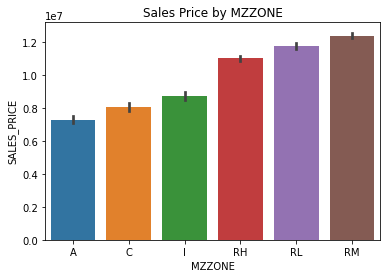

In [79]:
#we can use bar plot for comparing catagorical and continuous data
sns.barplot(df.MZZONE,df.SALES_PRICE,order=df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])
plt.title("Sales Price by MZZONE")
plt.show()

there is a linear relationship between this feature and target We need to do label encoding

**QS ROOMS VS SALES PRICE**

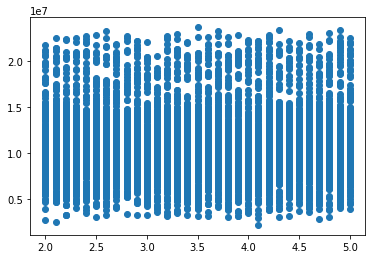

In [80]:
plt.scatter(df['QS_ROOMS'], df['SALES_PRICE'])

QS BATHROOM VS SALESPRICE

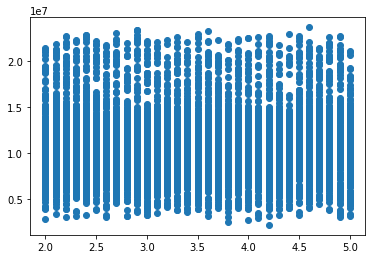

In [81]:
plt.scatter(df['QS_BATHROOM'], df['SALES_PRICE'])

QS BEDROOM VS SALES PRICE

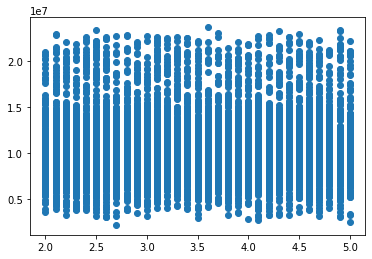

In [82]:
plt.scatter(df['QS_BEDROOM'], df['SALES_PRICE'])

QS_OVERALL VS SALESPRICE

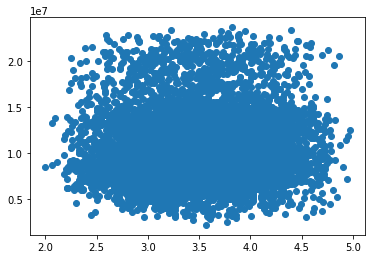

In [83]:
plt.scatter(df['QS_OVERALL'], df['SALES_PRICE'])

In [84]:
df=df.drop(['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis=1)#these features doesnt have any relationship so we are droppping the features.

AGE_OF_HOUSE vs SALES_PRICE

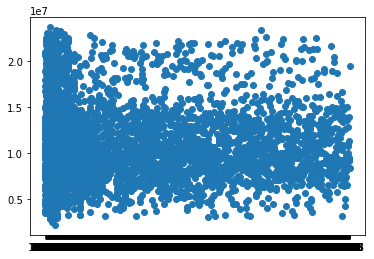

In [85]:
plt.scatter(df['AGE_OF_HOUSE'], df['SALES_PRICE'])

we dont need any encoding as it is continuous feature

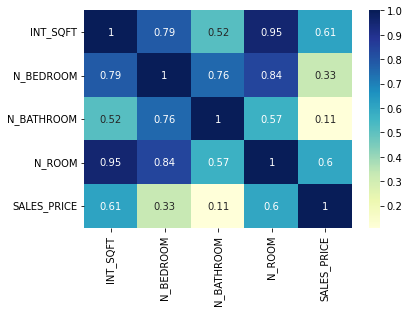

In [86]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [89]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE_OF_HOUSE
0,3,1004,2011-05-04,1,1,3,1,1967-05-15,0,2,0,7600000,16060
1,1,1986,2006-12-19,2,1,5,0,1995-12-22,0,0,3,21717770,4015


In [90]:
df=df.drop(['DATE_SALE','DATE_BUILD'],axis=1)

# SPLIT AND SCALING

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [92]:
X=df.drop(['SALES_PRICE'],axis=1)
y=df["SALES_PRICE"]

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

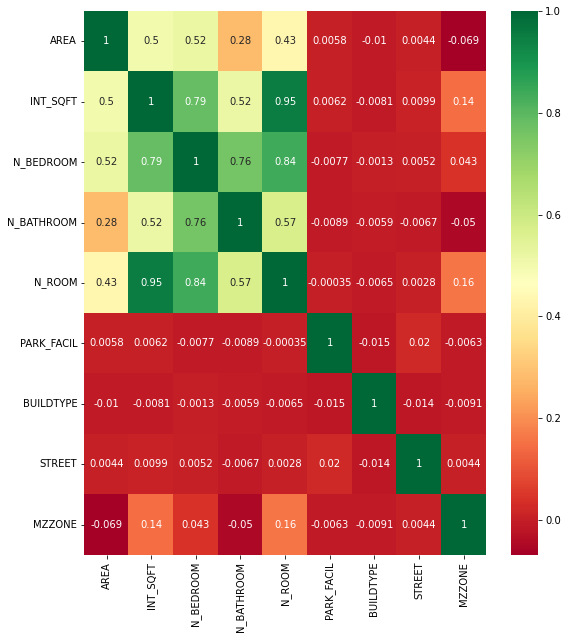

In [94]:
plt.figure(figsize=(9,10))
sns.heatmap(X_train.corr(), annot=True,cmap='RdYlGn')
plt.show()

In [95]:
df.dtypes

AREA             int64
INT_SQFT         int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
PARK_FACIL       int64
BUILDTYPE        int64
STREET           int64
MZZONE           int64
SALES_PRICE      int64
AGE_OF_HOUSE    object
dtype: object

In [96]:
scaler=StandardScaler()
minmax=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model

# **Linear regression**

In [97]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7870780271656477


In [98]:
y_pred = regr.predict(X_test)
y_pred

array([16881564.32940805,  9743367.95263685,  6754270.46625134, ...,
       11110852.83354296, 13766933.47951922, 10004777.28278666])

calculate r2 score 

In [99]:
from sklearn.metrics import r2_score
acc= r2_score(y_test,y_pred)
acc

0.7870780271656477

# **KNN**

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))
score=r2_score(y_test,y_pred)
print(score)

K value  : 1 Cross Value Accuracy : -0.13768526949256127
K value  : 2 Cross Value Accuracy : 0.1597503515955423
K value  : 3 Cross Value Accuracy : 0.255559218629106
K value  : 4 Cross Value Accuracy : 0.3056076452856165
K value  : 5 Cross Value Accuracy : 0.3283217886937021
K value  : 6 Cross Value Accuracy : 0.34067646535431406
K value  : 7 Cross Value Accuracy : 0.34708898271373245
K value  : 8 Cross Value Accuracy : 0.355023206474228
K value  : 9 Cross Value Accuracy : 0.36371924908763487
K value  : 10 Cross Value Accuracy : 0.3675867369232614
K value  : 20 Cross Value Accuracy : 0.39271263536535883
K value  : 30 Cross Value Accuracy : 0.39787660995167257
K value  : 40 Cross Value Accuracy : 0.4001520748998894
K value  : 50 Cross Value Accuracy : 0.39610915956616466
0.7870780271656477


# **DECISION TREE**

In [104]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9671690072887635


# **XG-BOOST**

In [106]:
import xgboost as xgb
xg_model= xgb.XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01,
                           max_depth=4, min_child_weight=1.5, n_estimators=10000,)
xg_model.fit(X_train_scaled, y_train)
xg_y_pred=xg_model.predict(X_test_scaled)
print(r2_score(y_test, xg_y_pred))

[14:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9947866454321115


# **RESULT**

LINEAR REGREESION R2 VALUE-0.7870780271656477

DECISION TREE-0.9671690072887635

**XG-BOOST-0.9947866454321115**


XG-BOOST IS THE BEST MODEL WITH THE ACCURACY SCORE EQUAL TO 1

SUGGESTIONS:The sales price is higher in T NAGAR than in other areas 
To be built in commercial build types so the answers to buyers depend on the area and number of rooms with facility

The real estate builders should build a house with facilities of more rooms and parking facility and the house to be built in KK NAGAR,ANNA NAGAR.
houses price are less compared to commercial and street type should br gravel.
